<h2 align="center">Data Analysis Project in Hospitality Sector<h2>

 To make an informed decision on increasing revenue and market share by analysing data. 

In [436]:
import pandas as pd
import matplotlib as plt

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a dataframe**

In [437]:
df_bookings=pd.read_csv('D:/JOB/codebasics_python_course/source-code/3_project_hospitality_analysis/datasets/fact_bookings.csv')
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


**Explore bookings data**

In [438]:
df_bookings.shape

(134590, 12)

In [439]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

*Data shows there are 4 different categories of rooms*

In [440]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [441]:
df_bookings.booking_platform.value_counts().sort_values()

booking_platform
direct offline     6755
journey            8106
tripster           9630
direct online     13379
logtrip           14756
makeyourtrip      26898
others            55066
Name: count, dtype: int64

<Axes: title={'center': 'Bookings through various platform'}>

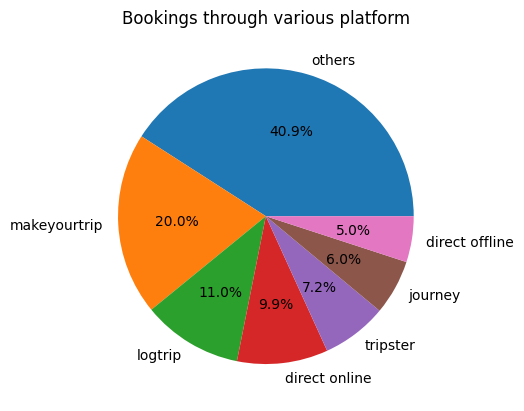

In [445]:
df_bookings.booking_platform.value_counts().plot(kind="pie",ylabel="",title="Bookings through various platform",autopct='%1.1f%%')

In [446]:
df_bookings.describe()


,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [447]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

*maximum revenue generated is abnormally high*

In [448]:
df_bookings.ratings_given.unique()

array([ 1., nan,  5.,  4.,  3.,  2.])

**Read Other Data sets**

In [299]:
df_date=pd.read_csv('D:/JOB/codebasics_python_course/source-code/3_project_hospitality_analysis/datasets/dim_date.csv')
df_hotels=pd.read_csv('D:/JOB/codebasics_python_course/source-code/3_project_hospitality_analysis/datasets/dim_hotels.csv')
df_rooms=pd.read_csv('D:/JOB/codebasics_python_course/source-code/3_project_hospitality_analysis/datasets/dim_rooms.csv')
df_agg_bookings=pd.read_csv('D:/JOB/codebasics_python_course/source-code/3_project_hospitality_analysis/datasets/fact_aggregated_bookings.csv')

**Explore hotels dataset**

In [300]:
df_hotels.shape

(25, 4)

In [301]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [302]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: title={'center': 'Hotels across cities'}, xlabel='number of hotels', ylabel='city'>

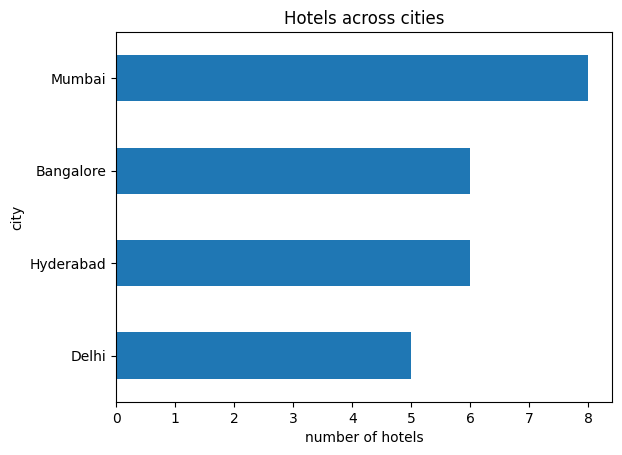

In [303]:
df_hotels.city.value_counts().sort_values().plot(kind="barh",xlabel='number of hotels',title="Hotels across cities")

In [304]:
df_hotels.groupby("city")["category"].value_counts()

city       category
Bangalore  Luxury      4
           Business    2
Delhi      Luxury      3
           Business    2
Hyderabad  Luxury      4
           Business    2
Mumbai     Luxury      5
           Business    3
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Hotel Categories by City')

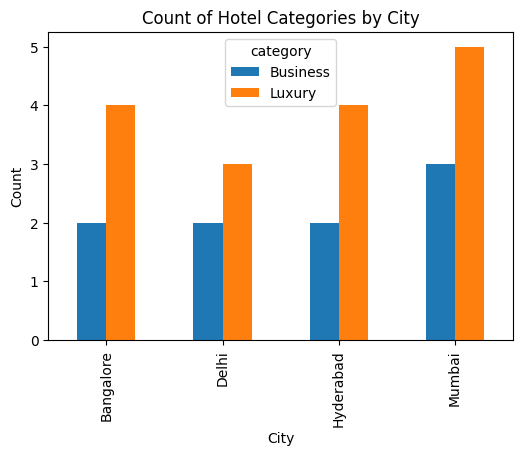

In [305]:
#plot 
grouped_data = df_hotels.groupby("city")["category"].value_counts().unstack()

ax = grouped_data.plot(kind='bar', figsize=(6,4))
ax.set_ylabel('Count')
ax.set_xlabel('City')
ax.set_title('Count of Hotel Categories by City')

**Explore aggregate bookings dataset**

In [306]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [307]:
df_agg_bookings.shape

(9200, 5)

In [308]:
df_agg_bookings.property_id.nunique()         #unique property ids

25

In [309]:
# total bookings per property_id
df_grp_prperty = df_agg_bookings.groupby("property_id")["successful_bookings"].sum()
df_grp_prperty

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

<Axes: title={'center': 'number of successful bookings'}, xlabel='property_id', ylabel='successful bookings'>

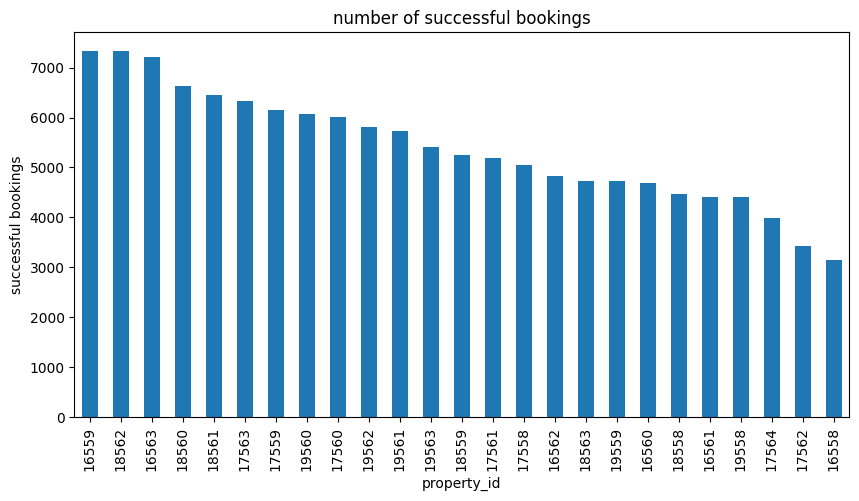

In [310]:
df_grp_prperty.sort_values(ascending = False).plot(kind="bar",figsize=(10,5),ylabel="successful bookings",title="number of successful bookings")

*Top 3 properties with maxmum successful bookings*

In [311]:
df_grp_prperty.sort_values(ascending = False).head(3)

property_id
16559    7338
18562    7333
16563    7211
Name: successful_bookings, dtype: int64

*properties with minimum successful bookings*

In [312]:
df_grp_prperty.sort_values(ascending = False).tail(3)

property_id
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

*dates on which bookings are greater than capacity*

In [313]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [314]:
df_agg_bookings.capacity.max(),df_agg_bookings.capacity.min()


(50.0, 3.0)

**Explore room dataset**

In [315]:
df_rooms.head(5)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


**Explore date dataset**

In [316]:
df_date.head(5)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [317]:
df_date.shape

(92, 4)

In [318]:
df_dateformat=df_date["date"]
df_dateformat=pd.to_datetime(df_dateformat, format = "%d-%b-%y")

In [319]:
# print date range 
print(df_dateformat.min(),df_dateformat.max())

2022-05-01 00:00:00 2022-07-31 00:00:00


*Date range is from 1st may 2022 to 31st july 2022*

***
### ==> 2. Data Cleaning
***

In [320]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [321]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

**maxumum generated revenue is very high**

In [322]:
df_bookings.revenue_realized.min(),df_bookings.revenue_realized.max()

(2600, 45220)

In [323]:
df_bookings[df_bookings.revenue_generated==df_bookings.revenue_generated.max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560


In [324]:
df_bookings[df_bookings.room_category=="RT3"].describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,30566.000000,30564.000000,12755.000000,3.056600e+04,30566.000000
mean,18119.854315,2.179427,3.592317,1.871783e+04,15120.275600
std,1100.141063,1.194881,1.234661,1.632995e+05,5693.119841
min,16558.000000,-6.000000,1.000000,1.200000e+04,4800.000000
25%,17558.000000,1.000000,3.000000,1.560000e+04,12000.000000
50%,18558.000000,2.000000,4.000000,1.800000e+04,16800.000000
75%,19558.000000,2.000000,5.000000,2.040000e+04,20400.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,28560.000000


**(1) Clean invalid guests**

In [325]:
df_bookings[df_bookings.no_guests<=0].no_guests.count()        # number of guests cannot be negative 

9

In [326]:
# since rows of no of negative guests rows (9) is very less as compared to total rows(134590).Hence they are ommited.

In [327]:
df_bookings=df_bookings[df_bookings.no_guests>=0]              
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [328]:
df_bookings.shape

(134578, 12)

**(2) Oulier removal in revenue generated**

In [329]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [330]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [331]:
avg,med,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.median(),df_bookings.revenue_generated.std()
avg,med,std

(15378.036937686695, 13500.0, 93040.1549314641)

In [332]:
higher_lmt=avg+3*std            # lower and higher limits of 3 sigma 
lower_lmt=avg-3*std

In [333]:
higher_lmt,lower_lmt     

(294498.50173207896, -263742.4278567056)

In [334]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [335]:
df_bookings[df_bookings.revenue_generated>higher_lmt]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [336]:
df_bookings=df_bookings[df_bookings.revenue_generated<=higher_lmt]     # Cleaned Booking data within 3 sigma limit
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [337]:
df_bookings.shape

(134573, 12)

**(3) outlier removal for revenue realized**

In [338]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [339]:
avg_rrealized,std_rrealized=df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()
avg_rrealized,std_rrealized

(12695.983585117372, 6927.791692242814)

In [340]:
higher_lmt_realized=avg_rrealized+3*std_rrealized
lower_lmt_realized=avg_rrealized-3*std_rrealized

In [341]:
higher_lmt_realized,lower_lmt_realized        # higher and lower limits of 3 sigma

(33479.358661845814, -8087.391491611072)

In [342]:
df_bookings[df_bookings.revenue_realized>higher_lmt_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [343]:
df_bookings[df_bookings.revenue_realized>higher_lmt_realized].room_category.unique()

array(['RT4'], dtype=object)

In [344]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [345]:
avg_rt4= df_bookings[df_bookings.room_category=="RT4"].revenue_realized.mean()
std_rt4= df_bookings[df_bookings.room_category=="RT4"].revenue_realized.std()
avg_rt4,std_rt4

(23439.308443780723, 9048.599075739918)

In [346]:
highrt_lmt_rt4= avg_rt4+3*std_rt4
lower_lmt_rt4= avg_rt4-3*std_rt4
highrt_lmt_rt4,lower_lmt_rt4                    # 3 sigma limits for RT4 

(50585.10567100048, -3706.4887834390283)

In [347]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.max()

45220

Here higher limit comes to be 50585 and in our dataframe for RT4 above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

**(4) Handling Null values**

In [348]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [349]:
df_bookings.shape

(134573, 12)

Total values in our dataframe is 134573. Out of that 77899 rows has null rating. Since there are many rows with null rating, these values are not filtered. Also these are not replaced with a median or mean rating etc 

In [350]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [351]:
df_agg_bookings[df_agg_bookings.capacity.isna()]  

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


Null values in capacity column to be replaced by median value. 

In [352]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [353]:
df_agg_bookings.capacity.median()

25.0

In [354]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(),inplace=True)    # null value replaced by median value

In [355]:
df_agg_bookings[df_agg_bookings.capacity.isna()]               # verified no null value now

,property_id,check_in_date,room_category,successful_bookings,capacity


In [356]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [357]:
df_agg_bookings.shape

(9200, 5)

Since successful_bookings cannot be greater than capacity, data cleaning needs to be done. Number of such rows is 6 which is very less than total 9200 rows. Hence these 6 rows are filtered. 

In [358]:
df_agg_bookings=df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]

In [359]:
df_agg_bookings.shape    

(9194, 5)

***
### ==>Data transformation
***

**Occuancy percentage coloumn**

In [360]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [361]:
df_agg_bookings["occ_pct"]= round(df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"],4)*100
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [362]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


***
### ==> 4. Insights Generation
***

In [363]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [364]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

In [365]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [366]:
df = pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")

In [367]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard
...,...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [368]:
df.drop("room_id",axis=1,inplace=True)

In [369]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard
...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


**(1) average occupancy rate in each of the room categories**

In [370]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

In [371]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [372]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard


In [373]:
df=pd.merge(df,df_hotels,left_on="property_id",right_on="property_id")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


**(2) average occupancy rate per city**

In [374]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

In [375]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [376]:
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


**(3.)average occupancy rate on Weekday and Weekend?**

In [377]:
df.groupby("day_type")["occ_pct"].mean()

day_type
weekeday    50.883140
weekend     72.343625
Name: occ_pct, dtype: float64

**(4) Average occupancy rate month wise**

In [378]:
df.groupby("mmm yy")["occ_pct"].mean()

mmm yy
Jul 22    55.708435
Jun 22    58.752992
May 22    57.068223
Name: occ_pct, dtype: float64

**(4) Average occupancy rate monthwise wise grouped by city**

In [379]:
df.groupby(["mmm yy","city"])["occ_pct"].mean()

mmm yy  city     
Jul 22  Bangalore    53.899829
        Delhi        59.177886
        Hyderabad    55.252163
        Mumbai       55.235469
Jun 22  Bangalore    56.436143
        Delhi        62.474286
        Hyderabad    58.458075
        Mumbai       58.382560
May 22  Bangalore    55.275492
        Delhi        59.650614
        Hyderabad    57.062405
        Mumbai       56.803139
Name: occ_pct, dtype: float64

Text(0.5, 1.0, 'Average occupancy percentage per month and city')

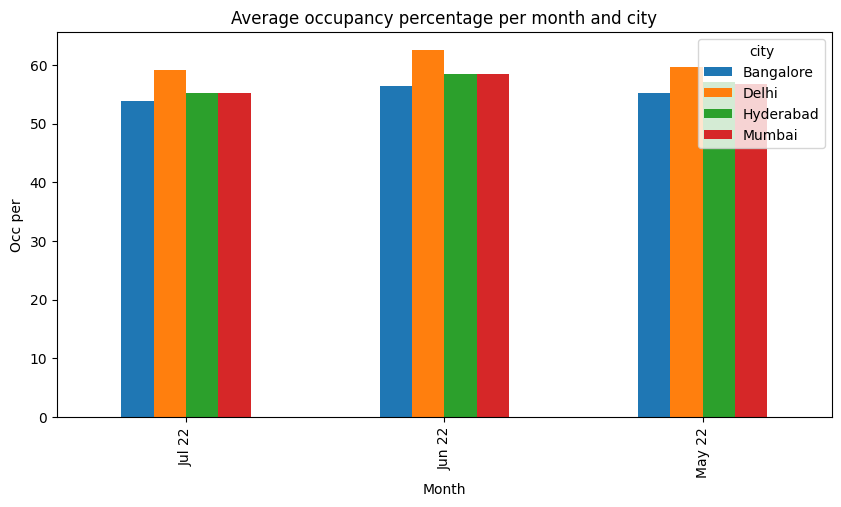

In [380]:
#plot 
month_city_data = df.groupby(["mmm yy","city"])["occ_pct"].mean().unstack()

ax = month_city_data.plot(kind='bar', figsize=(10,5))
ax.set_ylabel('Occ per')
ax.set_xlabel('Month')
ax.set_title('Average occupancy percentage per month and city')

 **We got new data for the month of august. Append that to existing data**

In [381]:
df_aug=pd.read_csv("D:/JOB/codebasics_python_course/source-code/3_project_hospitality_analysis/datasets/new_data_august.csv")

In [382]:
df_aug.head(4)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00


In [383]:
df_aug.shape

(7, 13)

In [384]:
df.shape

(6497, 14)

In [385]:
df_aug.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [386]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [387]:
latest_df= pd.concat([df,df_aug],ignore_index=True,axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [388]:
latest_df.shape

(6504, 15)

In [389]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [390]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [391]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


**(5) Revenue realized per city**

In [392]:
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values()

city
Delhi        294404488
Hyderabad    325179310
Bangalore    420383550
Mumbai       668569251
Name: revenue_realized, dtype: int64

**Print month by month revenue**

In [393]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [394]:
df_date["date"] = pd.to_datetime(df_date["date"], format = "%d-%b-%y")
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [395]:
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [396]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [397]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], format='mixed', dayfirst=True)
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [398]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [400]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum().sort_index(ascending=False)

mmm yy
May 22    581767396
Jun 22    553925855
Jul 22    572843348
Name: revenue_realized, dtype: int64

<Axes: xlabel='revenue realised in Cr.'>

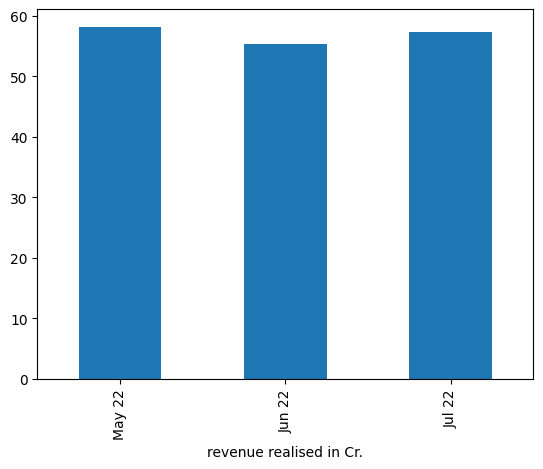

In [402]:
m_m_rev=df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()/10000000
m_m_rev.sort_index(ascending=False).plot(kind="bar",xlabel="revenue realised in Cr.")

**revenue realized per hotel type**

room_category
RT1    309547225
RT2    560216304
RT3    462079944
RT4    376693126
Name: revenue_realized, dtype: int64

In [404]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [407]:
df_bookings_all=pd.merge(df_bookings_all,df_rooms,left_on="room_category",right_on="room_id")

In [408]:
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type,room_id,room_class
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard


In [419]:
df_bookings_all.groupby(["room_category","room_class"])["revenue_realized"].sum().sort_index()

room_category  room_class  
RT1            Standard        309547225
RT2            Elite           560216304
RT3            Premium         462079944
RT4            Presidential    376693126
Name: revenue_realized, dtype: int64

<Axes: xlabel='room class', ylabel='revenue realized (Cr)'>

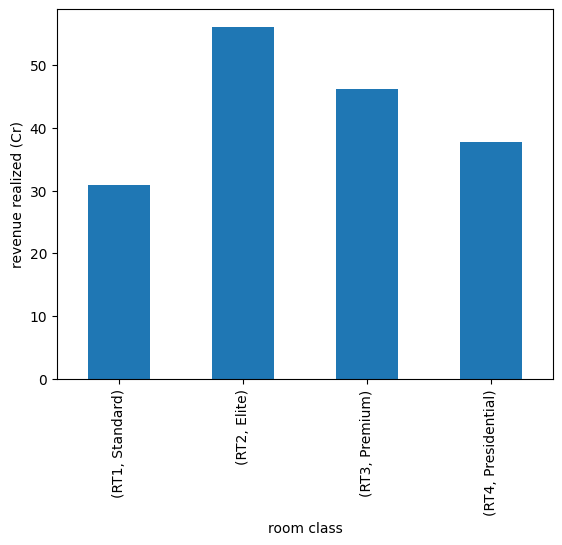

In [422]:
revR_hotel_type = df_bookings_all.groupby(["room_category","room_class"])["revenue_realized"].sum() / 10000000
revR_hotel_type.plot(kind="bar",xlabel="room class",ylabel="revenue realized (Cr)")

**average rating per city**

In [423]:
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type,room_id,room_class
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,...,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,...,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,...,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,...,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,RT1,Standard


<Axes: xlabel='ratings given', ylabel='city'>

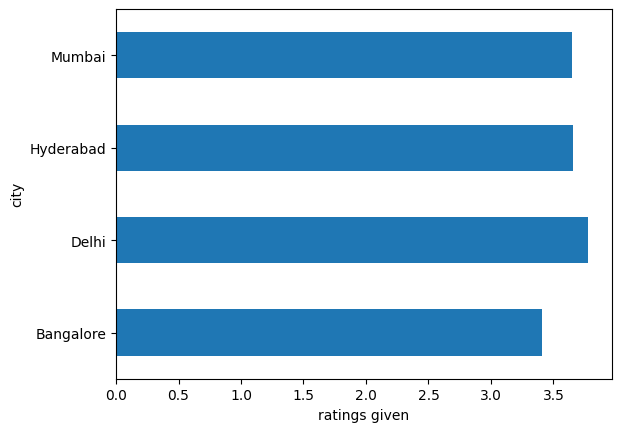

In [430]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2).plot(kind="barh",xlabel="ratings given")

**pie chart of revenue realized per booking platform**

In [431]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

<Axes: title={'center': 'reveue realized across platforms'}>

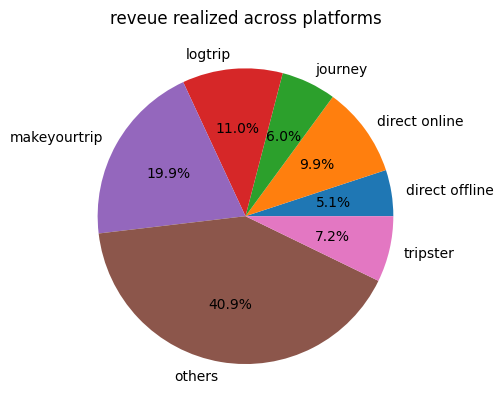

In [435]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie",ylabel="",autopct='%1.1f%%',title="reveue realized across platforms")